In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#Read in raw data
schoolData = pd.read_csv('C:/Users/jkras/Desktop/All_Data_By_School_Final.csv',low_memory=False)
testScores = pd.read_csv('C:/Users/jkras/Desktop/1516testresults_masking_removed.csv', low_memory=False)
raceData = pd.read_csv('C:/Users/jkras/Desktop/Ec_Pupils_Expanded (2017 Race Compositions by School).csv',low_memory=False)



piv_test = pd.pivot_table(testScores, values='Percent GLP',index=['School Code'],columns='Subject')

piv_test.index.name = 'unit_code'

piv_test.columns = [str(col) + '_GLP' for col in piv_test.columns]

piv_alltest = piv_test.reset_index()

schoolData_alltest = schoolData.merge(piv_alltest,how='left',on='unit_code')



racecols = ['Indian Male', 'Indian Female', 'Asian Male',
       'Asian Female', 'Hispanic Male', 'Hispanic Female', 'Black Male',
       'Black Female', 'White Male', 'White Female', 'Pacific Island Male',
       'Pacific Island Female', 'Two or  More Male', 'Two or  More Female',
       'Total', 'White', 'Black', 'Hispanic', 'Indian', 'Asian',
       'Pacific Island', 'Two or More', 'White_Pct', 'Majority_Minority']

racecols_renamed = [str(col) + '_RACE' for col in racecols]

racecol_rename_dict = {i:j for i,j in zip(racecols,racecols_renamed)}

raceData.rename(index=str, columns=racecol_rename_dict,inplace=True)

raceData['unit_code'] = raceData['unit_code'].apply(str)

for i,j in raceData.iterrows():
    
    if len(raceData['unit_code'][i]) == 5:
        raceData.loc[i, 'unit_code'] = '0' + raceData['unit_code'][i]
        

schoolData_testRace = schoolData_alltest.merge(raceData,how='left',on='unit_code')




region_df = testScores[['School Code','SBE District']]

region_df.rename(index=str, columns={'School Code':'unit_code'},inplace=True)

region_df_unique = region_df.drop_duplicates()

schoolData_testRaceRegion = schoolData_testRace.merge(region_df_unique,how='left',on='unit_code')

schoolData_testRaceRegion.shape


C:\Users\jkras\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


(2579, 352)

In [5]:
with pd.option_context('display.max_seq_items', None):
    print(schoolData_testRaceRegion.columns)

Index(['Year_x', 'unit_code', 'street_ad', 'scity_ad', 'state_ad', 'szip_ad',
       'type_cd_txt', 'Closed_Ind_Text', 'New_ind_Txt', 'category_cd',
       'school_type_txt', 'calendar_only_txt', 'title1_type_flg',
       'clp_ind_flg', 'focus_clp_flg', 'summer_program_flg', 'asm_no_spg_flg',
       'no_data_spg_flg', 'esea_status', 'student_num', 'lea_avg_student_num',
       'st_avg_student_num', 'Grad_project_status', 'stem_flg',
       'Avg_Class_Size_00', 'Avg_Class_Size_01', 'Avg_Class_Size_02',
       'Avg_Class_Size_03', 'Avg_Class_Size_04', 'Avg_Class_Size_05',
       'Avg_Class_Size_06', 'Avg_Class_Size_07', 'Avg_Class_Size_08',
       'Avg_Class_Size_Biology', 'Avg_Class_Size_EnglishII',
       'Avg_Class_Size_MathI', 'Avg_Dist_Size_00', 'Avg_Dist_Size_01',
       'Avg_Dist_Size_02', 'Avg_Dist_Size_03', 'Avg_Dist_Size_04',
       'Avg_Dist_Size_05', 'Avg_Dist_Size_06', 'Avg_Dist_Size_07',
       'Avg_Dist_Size_08', 'Avg_Dist_Size_Biology', 'Avg_Dist_Size_EnglishII',
       '

In [8]:
with pd.option_context('display.max_rows', None):
    print(schoolData_testRaceRegion.columns.value_counts())

PASSED_LAA_Dist_Pct                               1
state_ad                                          1
lateral_teach_pct                                 1
lea_tchyrs_4thru10_pct                            1
State Gap Compared                                1
lea_wap_num                                       1
nat_sat_participation_pct                         1
st_cte_courses                                    1
st_lateral_teach_pct                              1
advance_dgr_pct                                   1
Asian Female_RACE                                 1
st_prin_male_pct                                  1
White Female_RACE                                 1
PASSED_RTA_Dist_Pct                               1
Total_RACE                                        1
White_Pct_RACE                                    1
other_expense_pct                                 1
st_total_specialized_courses                      1
ap_ib_courses                                     1
Pacific Isla

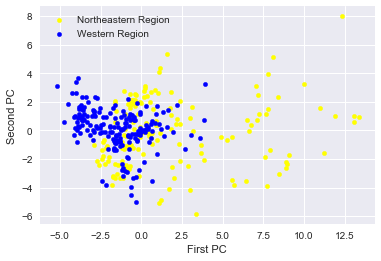

In [55]:
#aliasing completely merged dataframe from the previous merging script 'NC_Educ_Data_All_Merge.py'
all_df = schoolData_testRaceRegion

#subsetting data from the two districts of interest
all_df_NE = all_df[all_df['SBE District'] == 'Northeast Region']
all_df_W = all_df[all_df['SBE District'] == 'Western Region']

#expenditures variable list
exp_list = ['lea_total_expense_num','lea_salary_expense_pct','lea_benefits_expense_pct','lea_services_expense_pct',
'lea_supplies_expense_pct','lea_instruct_equip_exp_pct']

#teacher qualifications variable list
teach_list = ['flicensed_teach_pct', 'tchyrs_0thru3_pct', 'tchyrs_4thru10_pct', 'tchyrs_11plus_pct', 'class_teach_num', 'nbpts_num', 'advance_dgr_pct',
'_1yr_tchr_trnovr_pct', 'emer_prov_teach_pct', 'lateral_teach_pct', 'highqual_class_pct', 'lea_flicensed_teach_pct',
'lea_tchyrs_0thru3_pct', 'lea_tchyrs_4thru10_pct', 'lea_tchyrs_11plus_pct', 'lea_class_teach_num', 'lea_nbpts_num', 'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct', 'lea_emer_prov_teach_pct', 'lea_lateral_teach_pct', 'lea_highqual_class_pct', 'lea_highqual_class_hp_pct',
'lea_highqual_class_lp_pct', 'lea_highqual_class_all_pct', 'lea_not_highqual_class_hp_pct', 'lea_not_highqual_class_lp_pct',
'lea_not_highqual_class_all_pct']

#performance scores list
grade_list = ['SPG Score', 'Reading  SPG Score', 'Math SPG Score', 'EVAAS Growth Score', 'Overall Achievement Score', 'Read Score', 'Math Score',
'Science Score', 'Math I Score', 'English II Score', 'Biology Score', 'The ACT Score', 'ACT WorkKeys Score', 'Math Course Rigor Score',
'Cohort Graduation Rate Standard Score']



#ALL OF THE ABOVE IS FOUND IN THE 'NC_Educ_Data_Region_Comparative_Heatmaps.py' SCRIPT!



#shape of Western Region records
#all_df_W.shape

#shape of Northeastern Region records
#all_df_NE.shape

#create list of all expenditure, teacher qualification, and performance score column names; add region label
#pc_list = teach_list + exp_list + grade_list + ['SBE District']

pc_list_nogrades = teach_list + exp_list + ['SBE District']

#concatenate the Northeastern and Western Region dataframes; check for correct shape
df_WandNE = pd.concat([all_df_NE,all_df_W],axis=0)
#df_WandNE.shape

#cast region label to categorical type for integer coding; used below for PCA
df_WandNE['SBE District'] = df_WandNE['SBE District'].astype('category')
df_WandNE['SBE District'] = df_WandNE['SBE District'].cat.codes

#check value counts; Western Region coded to integer '1', Northeastern Region coded to integer '0'
#df_WandNE['SBE District'].value_counts()

#subset concatenated Western and Northeastern Region data with list of variable names of interest; check for correct shape
#pc_df = df_WandNE[pc_list]
#pc_df.shape

pc_df_nogrades = df_WandNE[pc_list_nogrades]

#create flattened dataframe of variable names in the PC list (and check shape); used in PCA below
#flatten_pc_list = pd.DataFrame({'vars':pc_list})
flatten_pc_list = pd.DataFrame({'vars':pc_list_nogrades})
flat_pc_list = flatten_pc_list.values.flatten()
#flat_pc_list.shape

#mean impute NAs of columns used in PCA
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
#imp.fit(pc_df)
#imp_data = imp.transform(pc_df)
imp.fit(pc_df_nogrades)
imp_data = imp.transform(pc_df_nogrades)

#after imputation, scale all the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(imp_data)
scaled_data = scaler.transform(imp_data)

#perform PCA on scaled data, identifying 6 components; check for correct shape
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
#scaled_data.shape

#plot first two PCs to compare the two regions; note the separation!
pc_1 = x_pca[:,0] #first PC values
pc_2 = x_pca[:,1] #second PC values
pc_region = pc_df_nogrades['SBE District'] #setting region values to temporar variable; necessary for color-coded plot legend
test_pc_df = pd.DataFrame(dict(c0=pc_1,c1=pc_2,c2=pc_region)) #temporary dataframe that combines the first two PC values and the region values; necessary for color-coded plot legend

colors = {1:'blue',0:'yellow'} #map colors to categorical coding of the two regions; 1 = Western Region, 2 = Northeastern Region

#plot PC1 as X, PC2 as Y, using the color mapping of the two regions
fig,ax = plt.subplots()
for key,group in test_pc_df.groupby('c2'):
    group.plot.scatter(ax=ax,x='c0',y='c1',label=key,color=colors[key])

#rename the x and y axis labels
plt.xlabel('First PC')
plt.ylabel('Second PC')

#grab the legend and reset the text of the labels to the corresponding regions; Western = blue, Northeastern = yellow
L = plt.legend()
L.get_texts()[0].set_text('Northeastern Region')
L.get_texts()[1].set_text('Western Region')

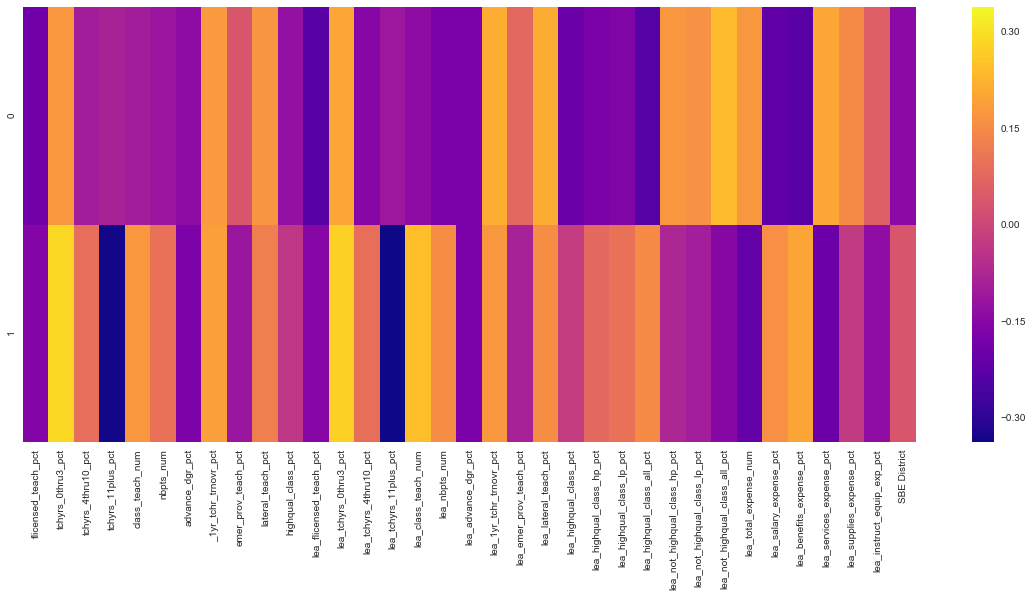

In [56]:
#create dataframe of PC profiles and their corresponding variable names (from the flattened pc_list above)
df_comp = pd.DataFrame(pca.components_,columns=flat_pc_list)

#check PC profiles if desired
#with pd.option_context('display.max_columns', None):
#    print(df_comp)

#heatmap of profiles for the six PCs
plt.figure(figsize=(20,8))
sns.heatmap(df_comp,cmap='plasma')

In [63]:
fullpc_list_filter = pc_list_nogrades + ['SPG Score Scaled']

fullpc_df = all_df[fullpc_list_filter]
#fullpc_df.shape

fullpc_df['SBE District'] = fullpc_df['SBE District'].astype('category')
fullpc_df['SBE District'] = fullpc_df['SBE District'].cat.codes

#fullpc_df['SPG Score Scaled'] = fullpc_df['SPG Score']*(.01)
#pd.Series.to_frame(fullpc_df['SPG Score Scaled']).shape

#mean_fill = fullpc_df.groupby('SBE District')['SPG Score Scaled'].transform('mean')
#fullpc_df['SPG Score Scaled'] = fullpc_df['SPG Score Scaled'].fillna(mean_fill)

#fullpc_df['SPG Score Scaled'] = pd.Series.to_frame(fullpc_df['SPG Score Scaled']).fillna(pd.Series.to_frame(fullpc_df['SPG Score Scaled']).mean())

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
imp.fit(fullpc_df)
imp_data = imp.transform(fullpc_df)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(imp_data)
scaled_data = scaler.transform(imp_data)

from sklearn.decomposition import PCA
pca = PCA(n_components=16)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape

C:\Users\jkras\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jkras\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(2579, 36)

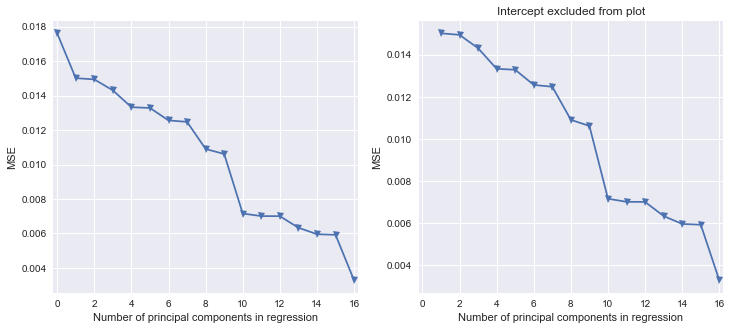

In [64]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

all_df['SPG Score Scaled'] = all_df['SPG Score']*(.01)
#pd.Series.to_frame(all_df['SPG Score Scaled']).shape

mean_fill = all_df.groupby('SBE District')['SPG Score Scaled'].transform('mean')
all_df['SPG Score Scaled'] = all_df['SPG Score Scaled'].fillna(mean_fill)

all_df['SPG Score Scaled'] = pd.Series.to_frame(all_df['SPG Score Scaled']).fillna(pd.Series.to_frame(all_df['SPG Score Scaled']).mean())

y = all_df['SPG Score Scaled']

n = len(x_pca)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True,random_state=101)

regr = LinearRegression()
mse = []

score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)


for i in np.arange(1,17):
    score = -1*cross_validation.cross_val_score(regr,x_pca[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], mse[1:17], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,16.2))


(-0.2, 16.2)

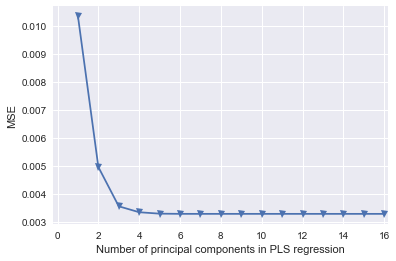

In [65]:
from sklearn.preprocessing import scale
from sklearn.cross_decomposition import PLSRegression

mse = []

kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=101)

for i in np.arange(1, 17):
    pls = PLSRegression(n_components=i, scale=False)
    pls.fit(scale(x_pca),y)
    score = cross_validation.cross_val_score(pls, x_pca, y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 17), np.array(mse), '-v')
plt.xlabel('Number of principal components in PLS regression')
plt.ylabel('MSE')
plt.xlim((-0.2, 16.2))


In [43]:
#pc_list_nogrades

In [44]:
#fullpc_list = pc_list_nogrades + ['SPG Score Scaled']
#fullpc_list

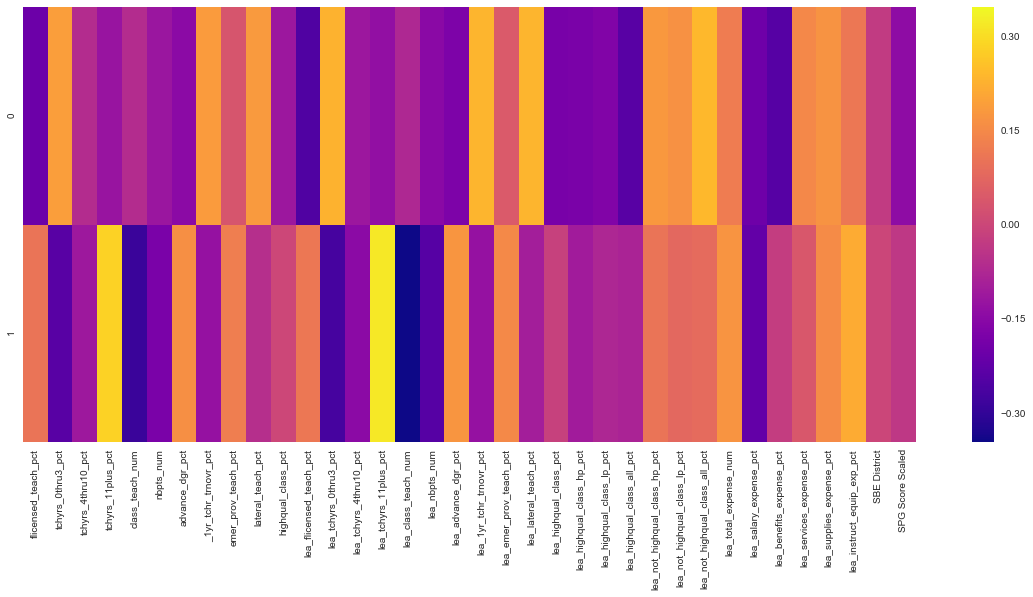

In [66]:
fullpc_list = pc_list_nogrades + ['SPG Score Scaled']

flatten_fullpc_list = pd.DataFrame({'vars':fullpc_list})
flat_fullpc_list = flatten_fullpc_list.values.flatten()
flat_fullpc_list.shape

fulldf_comp = pd.DataFrame(pca.components_[:2],columns=flat_fullpc_list)
#with pd.option_context('display.max_columns', None):
#    print(df_comp)

plt.figure(figsize=(20,8))
sns.heatmap(fulldf_comp,cmap='plasma')

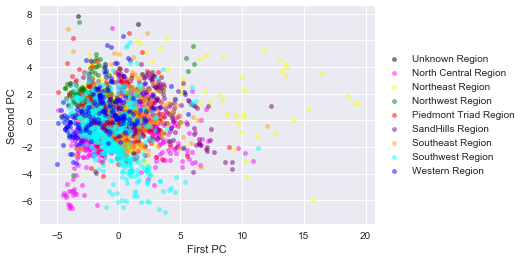

In [67]:
#fullpc_df['SBE District'].value_counts()

#all_df['SBE District'].value_counts()

pc_1 = x_pca[:,0]
pc_2 = x_pca[:,1]
fullpc_region = fullpc_df['SBE District']
fulltest_pc_df = pd.DataFrame(dict(c0=pc_1,c1=pc_2,c2=fullpc_region))

colors = {1:'yellow',7:'blue',2:'green',3:'red',4:'purple',5:'orange',6:'cyan',0:'magenta',-1:'black'}

fig,ax = plt.subplots()
for key,group in fulltest_pc_df.groupby('c2'):
    group.plot.scatter(ax=ax,x='c0',y='c1',label=key,color=colors[key],alpha=0.5)

plt.xlabel('First PC')
plt.ylabel('Second PC')
L = plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
L.get_texts()[0].set_text('Unknown Region')
L.get_texts()[1].set_text('North Central Region')
L.get_texts()[2].set_text('Northeast Region')
L.get_texts()[3].set_text('Northwest Region')
L.get_texts()[4].set_text('Piedmont Triad Region')
L.get_texts()[5].set_text('SandHills Region')
L.get_texts()[6].set_text('Southeast Region')
L.get_texts()[7].set_text('Southwest Region')
L.get_texts()[8].set_text('Western Region')
